In [29]:
import matplotlib.pyplot as plt #this is for plotting
import numpy as np  #this handles numerical arrays
import pandas as pd  #this creates data frames
import seaborn as sns  

from sklearn import datasets
from sklearn import manifold #this is used t perform t-SNE




In [30]:
data = datasets.fetch_openml('mnist_784',
                             version=1,
                             return_X_y=True)# fetched data using sklearn datasets
pixel_values,targets = data #array of pixel values ,#array of targets
targets =targets.astype(int) #converted to int type

In [31]:
# pixel_values two dimensional array of shape 70000*784
#70000 images , size 28*28 pixels .
#There are 784 columns and 70000 data points

In [32]:
#reshaping them to original shape #plotting using plotlib

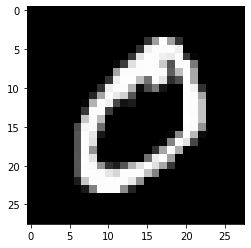

In [33]:
#as_frame in sklearn.datasets.fetch_openml changed from False to 'auto' in 0.24.
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)

#single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap='gray')

#plots a single image

In [34]:
tsne = manifold.TSNE(n_components=2,random_state=42)
transformed_data=tsne.fit_transform(pixel_values.iloc[:3000,:1])
#the transformed_data is array_shaped in two-dimensional setting

In [38]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns =["x","y","targets"]
)

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [36]:
#pandas dataframe from a numpy array , three columns :x,y and targets , x and y are two components from t-SNE decomposition

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


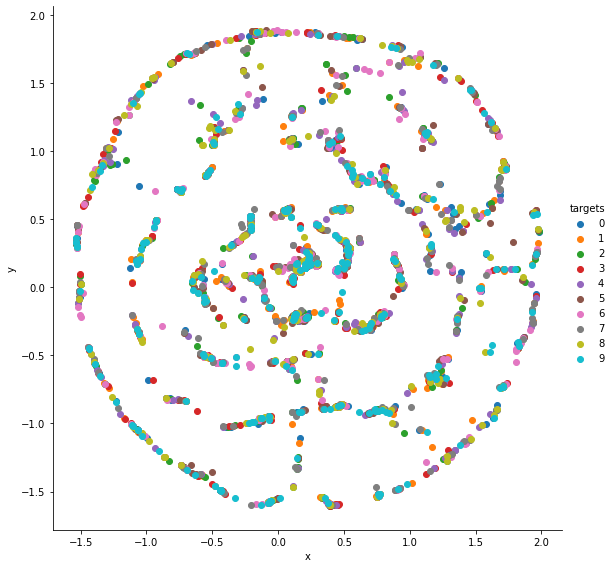

In [39]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [37]:
()

()